In [1]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import pycountry_convert as pc
warnings.filterwarnings('ignore')
import pylab as py

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
data= pd.read_csv('Forbes Best Countries For Business.csv')

In [4]:
data

,Rank,Name,GDP Growth,GDP per Capita,Trade Balance/GDP,Population
0,1,United Kingdom,1.70%,"$39,700",-3.80%,65.1 M
1,2,Sweden,2.10%,"$53,400",3.30%,9 M
2,3,Hong Kong,3.80%,"$46,200",4.30%,7.2 M
3,4,Netherlands,2.90%,"$48,200",10.50%,17.2 M
4,5,New Zealand,3%,"$42,900",-2.70%,4.5 M
...,...,...,...,...,...,...
156,157,Chad,-3.10%,$700,-5.70%,15.8 M
157,158,Equatorial Guinea,-3.20%,"$9,900",-5.90%,0.8 M
158,159,Guinea-Bissau,5.90%,$700,-2%,1.8 M
159,160,Republic of the Congo,-3.10%,"$1,700",-12.90%,5.1 M


In [5]:
#Rename the GDP Growth Column to GDP_GROWTH and GDP per Captital to GDP_PER_CAPITAL

data.rename(columns={'GDP Growth':'GDP_Growth', 'GDP per Capita':'GDP_per_Capita'},inplace=True)

In [6]:
data

,Rank,Name,GDP_Growth,GDP_per_Capita,Trade Balance/GDP,Population
0,1,United Kingdom,1.70%,"$39,700",-3.80%,65.1 M
1,2,Sweden,2.10%,"$53,400",3.30%,9 M
2,3,Hong Kong,3.80%,"$46,200",4.30%,7.2 M
3,4,Netherlands,2.90%,"$48,200",10.50%,17.2 M
4,5,New Zealand,3%,"$42,900",-2.70%,4.5 M
...,...,...,...,...,...,...
156,157,Chad,-3.10%,$700,-5.70%,15.8 M
157,158,Equatorial Guinea,-3.20%,"$9,900",-5.90%,0.8 M
158,159,Guinea-Bissau,5.90%,$700,-2%,1.8 M
159,160,Republic of the Congo,-3.10%,"$1,700",-12.90%,5.1 M


In [7]:
#Check for Empty Values , visualize if there is any null columns and Desciptive Analysis on the Dataset

empty_col=[col for col in data.columns if data[col].isnull().any()]

In [8]:
empty_col

[]

In [9]:
empty=[]
for col in data.columns:
    if data[col].isnull().any():
        empty.append(col)
print(empty)
        

[]


<AxesSubplot:>

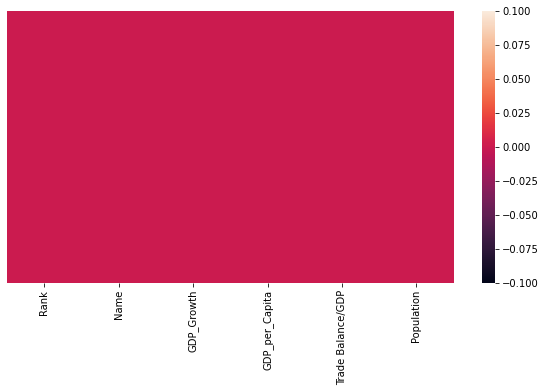

In [10]:
fig=py.figure(figsize=(10,5))
sns.heatmap(data.isnull(),yticklabels=False)

In [11]:
percent=[.30, .55,.93,.65, .72, .395]
data.describe(percentiles=percent)

,Rank
count,161.000000
mean,80.993789
std,46.616319
min,1.000000
30%,49.000000
39.5%,64.200000
50%,81.000000
55%,89.000000
65%,105.000000
72%,116.200000


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Rank               161 non-null    int64 
 1   Name               161 non-null    object
 2   GDP_Growth         161 non-null    object
 3   GDP_per_Capita     161 non-null    object
 4   Trade Balance/GDP  161 non-null    object
 5   Population         161 non-null    object
dtypes: int64(1), object(5)
memory usage: 7.7+ KB


In [13]:
data.mean()

Rank    80.993789
dtype: float64

In [14]:
data.median()

Rank    81.0
dtype: float64

In [15]:
data.std()

Rank    46.616319
dtype: float64

In [16]:
pd.isnull(data).any()

Rank                 False
Name                 False
GDP_Growth           False
GDP_per_Capita       False
Trade Balance/GDP    False
Population           False
dtype: bool

In [17]:
#Sort the GDP_GROWTH columns in decending order

data.sort_values(by=['GDP_Growth'],ascending=False).head()

,Rank,Name,GDP_Growth,GDP_per_Capita,Trade Balance/GDP,Population
93,94,Ghana,8.40%,"$1,600",-4.50%,28.1 M
150,151,Guinea,8.20%,$800,-6.90%,11.9 M
115,116,Nepal,7.90%,$800,-0.40%,29.7 M
116,117,Cote d'Ivoire,7.80%,"$1,700",-4.60%,26.3 M
80,81,Armenia,7.50%,"$3,900",-2.80%,2 M


In [18]:
def p2f(x):
    return float(x.strip('%'))

In [19]:
data['GDP_Growth']=data['GDP_Growth'].apply(p2f)

In [20]:
data

,Rank,Name,GDP_Growth,GDP_per_Capita,Trade Balance/GDP,Population
0,1,United Kingdom,1.7,"$39,700",-3.80%,65.1 M
1,2,Sweden,2.1,"$53,400",3.30%,9 M
2,3,Hong Kong,3.8,"$46,200",4.30%,7.2 M
3,4,Netherlands,2.9,"$48,200",10.50%,17.2 M
4,5,New Zealand,3.0,"$42,900",-2.70%,4.5 M
...,...,...,...,...,...,...
156,157,Chad,-3.1,$700,-5.70%,15.8 M
157,158,Equatorial Guinea,-3.2,"$9,900",-5.90%,0.8 M
158,159,Guinea-Bissau,5.9,$700,-2%,1.8 M
159,160,Republic of the Congo,-3.1,"$1,700",-12.90%,5.1 M


<AxesSubplot:ylabel='Name'>

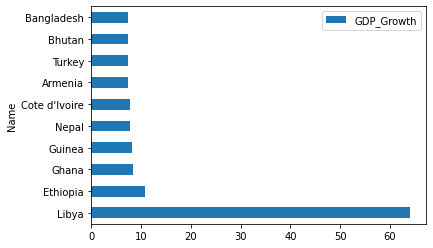

In [21]:
# Visualize Top 10 Countries by GDP_GROWTH

dp=data.nlargest(n=10, columns='GDP_Growth')
dp[['Name','GDP_Growth']].head(10).plot(x='Name',kind='barh')

In [22]:
def D2f(y):
    y=str(y).lstrip('$').replace(",","")
    return float(y)

In [23]:
data['GDP_per_Capita']=data['GDP_per_Capita'].apply(D2f)

In [24]:
#Sort the GDP_PER_CAPITAL column in desecnding Order

data.sort_values(by=['GDP_per_Capita','Name'],ascending=False).head(10)

,Rank,Name,GDP_Growth,GDP_per_Capita,Trade Balance/GDP,Population
22,23,Luxembourg,2.3,104100.0,5%,0.6 M
9,10,Switzerland,1.7,80200.0,9.80%,8.3 M
14,15,Norway,1.9,75500.0,5.50%,5.4 M
25,26,Iceland,4.0,70100.0,3.50%,0.3 M
10,11,Ireland,7.2,69300.0,8.50%,5.1 M
44,45,Qatar,1.6,63500.0,3.90%,2.4 M
16,17,United States,2.2,59500.0,-2.30%,329.3 M
7,8,Singapore,3.6,57700.0,18.80%,5 M
6,7,Denmark,2.3,56300.0,7.60%,5.8 M
8,9,Australia,2.2,53800.0,-2.60%,23.5 M


In [25]:
#Visualize Top 10 countries by GDP_PER_CAPITAL

cd=data.nlargest(n=10, columns='GDP_per_Capita')

<AxesSubplot:xlabel='Name'>

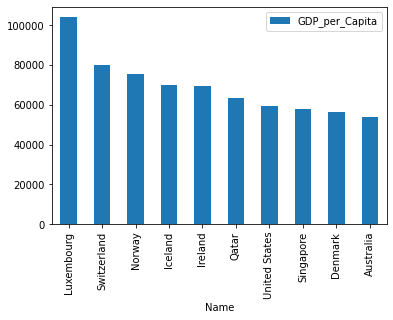

In [26]:
cd[['Name','GDP_per_Capita']].plot(x='Name',kind='bar')

In [27]:
#What are the top 10 countries with the lowest GDP_GROWTH

low_gdp=data.nsmallest(n=10, columns='GDP_Growth')
low_gdp

,Rank,Name,GDP_Growth,GDP_per_Capita,Trade Balance/GDP,Population
153,154,Syria,-36.5,1300.0,-8.60%,19.5 M
142,143,Venezuela,-14.0,6600.0,2%,31.7 M
152,153,Yemen,-5.9,1100.0,-4%,28.7 M
110,111,Timor-Leste,-4.6,2300.0,-10.20%,1.3 M
70,71,Kuwait,-3.3,29000.0,5.90%,2.9 M
157,158,Equatorial Guinea,-3.2,9900.0,-5.90%,0.8 M
156,157,Chad,-3.1,700.0,-5.70%,15.8 M
159,160,Republic of the Congo,-3.1,1700.0,-12.90%,5.1 M
84,85,Trinidad and Tobago,-2.6,16100.0,10.20%,1.2 M
137,138,Angola,-2.5,4200.0,-1%,30.4 M


<AxesSubplot:ylabel='Name'>

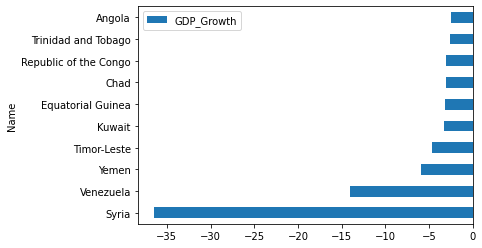

In [28]:
#Visualize the Top 10 Countries with the lowest GDP_GRowth 

low_gdp[['Name','GDP_Growth']].plot(kind='barh',x='Name')

In [29]:
data.head(2)

,Rank,Name,GDP_Growth,GDP_per_Capita,Trade Balance/GDP,Population
0,1,United Kingdom,1.7,39700.0,-3.80%,65.1 M
1,2,Sweden,2.1,53400.0,3.30%,9 M


In [30]:
#What are the top 10 countries with the lowest GDP_PER_CAPITAL						

low_capita=data.nsmallest(n=10, columns='GDP_per_Capita')
low_capita

,Rank,Name,GDP_Growth,GDP_per_Capita,Trade Balance/GDP,Population
135,136,Malawi,4.0,300.0,-9.50%,19.8 M
148,149,Burundi,0.0,300.0,-12.30%,11.8 M
124,125,Madagascar,4.2,400.0,-0.30%,25.7 M
126,127,Niger,4.9,400.0,-14.10%,19.9 M
144,145,Mozambique,3.7,400.0,-22.40%,27.2 M
160,161,Central African Republic,4.3,400.0,-8.40%,5.7 M
130,131,Sierra Leone,3.7,500.0,-11.30%,6.3 M
140,141,Liberia,2.5,500.0,-19.10%,4.8 M
149,150,Democratic Republic of the Congo,3.4,500.0,-0.50%,85.3 M
154,155,Gambia,4.6,500.0,-13.10%,2.1 M


<AxesSubplot:ylabel='Name'>

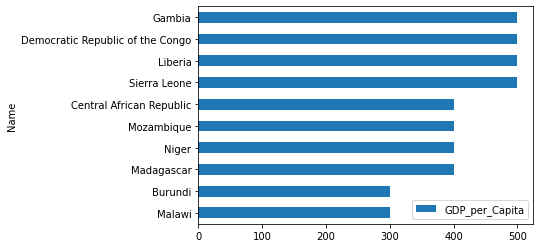

In [31]:
#Visualize the Top 10 Countries with the lowest GDP_PER_CAPITAL

low_capita[['Name','GDP_per_Capita']].plot(kind='barh',x='Name')

In [32]:
data['Trade Balance/GDP']=data['Trade Balance/GDP'].apply(p2f)

In [33]:
data

,Rank,Name,GDP_Growth,GDP_per_Capita,Trade Balance/GDP,Population
0,1,United Kingdom,1.7,39700.0,-3.8,65.1 M
1,2,Sweden,2.1,53400.0,3.3,9 M
2,3,Hong Kong,3.8,46200.0,4.3,7.2 M
3,4,Netherlands,2.9,48200.0,10.5,17.2 M
4,5,New Zealand,3.0,42900.0,-2.7,4.5 M
...,...,...,...,...,...,...
156,157,Chad,-3.1,700.0,-5.7,15.8 M
157,158,Equatorial Guinea,-3.2,9900.0,-5.9,0.8 M
158,159,Guinea-Bissau,5.9,700.0,-2.0,1.8 M
159,160,Republic of the Congo,-3.1,1700.0,-12.9,5.1 M


In [34]:
def million_float(value):
    value=str(value).rstrip('M').replace(",","")
    value=float(value)*(10**6)
    return value

In [35]:
data['Population']=data['Population'].apply(million_float)

In [36]:
data.head(10)

,Rank,Name,GDP_Growth,GDP_per_Capita,Trade Balance/GDP,Population
0,1,United Kingdom,1.7,39700.0,-3.8,65100000.0
1,2,Sweden,2.1,53400.0,3.3,9000000.0
2,3,Hong Kong,3.8,46200.0,4.3,7200000.0
3,4,Netherlands,2.9,48200.0,10.5,17200000.0
4,5,New Zealand,3.0,42900.0,-2.7,4500000.0
5,6,Canada,3.0,45000.0,-2.9,35900000.0
6,7,Denmark,2.3,56300.0,7.6,5800000.0
7,8,Singapore,3.6,57700.0,18.8,5000000.0
8,9,Australia,2.2,53800.0,-2.6,23500000.0
9,10,Switzerland,1.7,80200.0,9.8,8300000.0


In [ ]:
#Show if there is any Outliers in the columns				


In [37]:
#Recall in general Mathematics(MTH104)
#Z score = (Observation - Mean)/Standard Deviation
outliers=[]
def detect_outlier(data_1):
    threshold=3
    mean_col=np.mean(data_1)
    std_col=np.std(data_1)
    
    for y in data_1:
        z_score=(y-mean_col)/std_col
        if np.abs(z_score)>threshold:
            outliers.append(y)
    return outliers

In [38]:
detect_outlier(data['GDP_Growth'])

[64.0, -36.5]

In [39]:
detect_outlier(data['Trade Balance/GDP'])

[64.0, -36.5, 24.5]

<AxesSubplot:xlabel='GDP_Growth', ylabel='Count'>

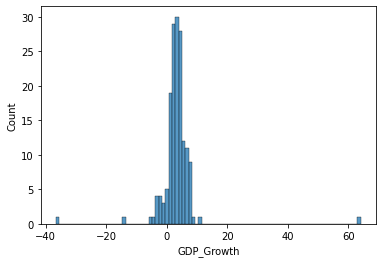

In [40]:

sns.histplot(data['GDP_Growth'])

<AxesSubplot:>

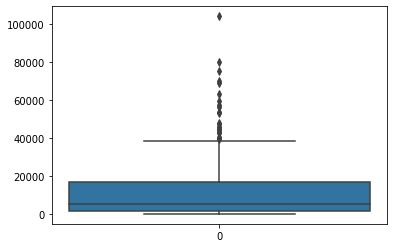

In [41]:
sns.boxplot(data['GDP_per_Capita'],width=0.9)

<AxesSubplot:>

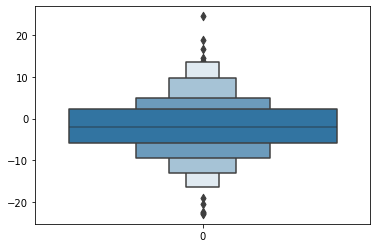

In [42]:
sns.boxenplot(data['Trade Balance/GDP'])

<AxesSubplot:>

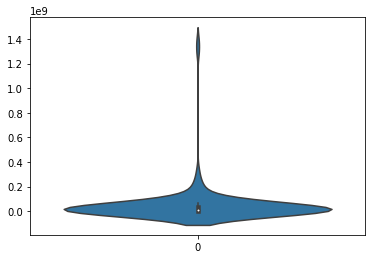

In [43]:
sns.violinplot(data['Population'])

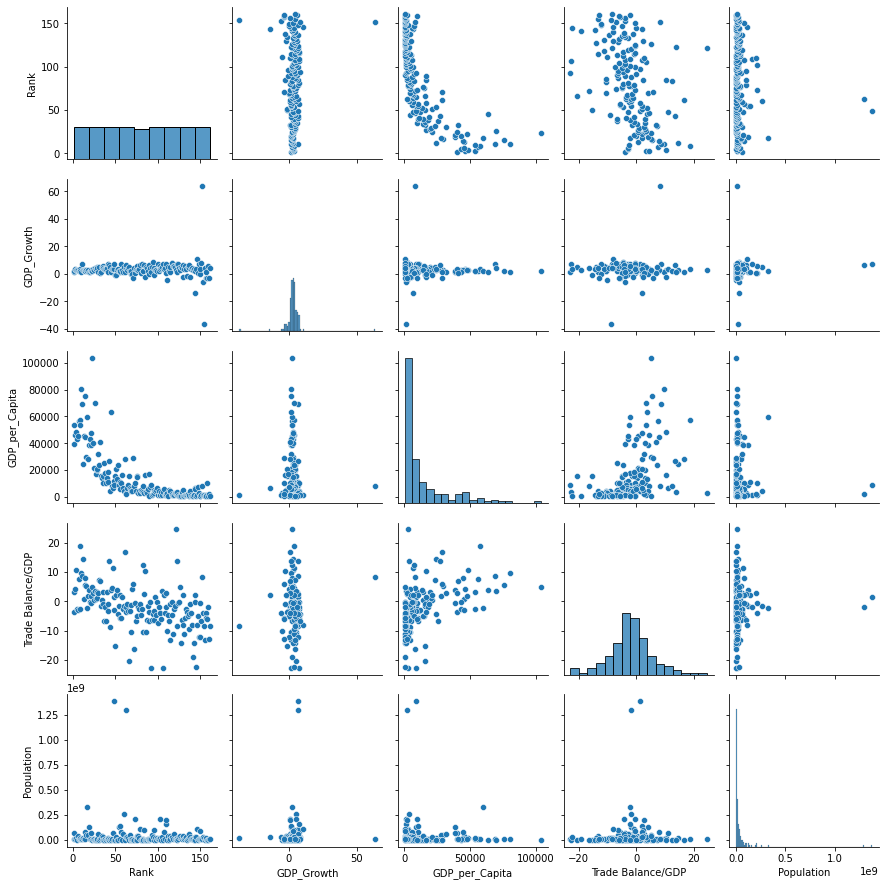

In [44]:
sns.pairplot(data, size=2.5)

In [46]:
#Show If there is any relationship  between the population and the GDP_Growth

data.corr()

,Rank,GDP_Growth,GDP_per_Capita,Trade Balance/GDP,Population
Rank,1.000000,0.009962,-0.731181,-0.429539,-0.080252
GDP_Growth,0.009962,1.000000,-0.045310,0.061545,0.062035
GDP_per_Capita,-0.731181,-0.045310,1.000000,0.440226,-0.053047
Trade Balance/GDP,-0.429539,0.061545,0.440226,1.000000,0.043972
Population,-0.080252,0.062035,-0.053047,0.043972,1.000000


<AxesSubplot:>

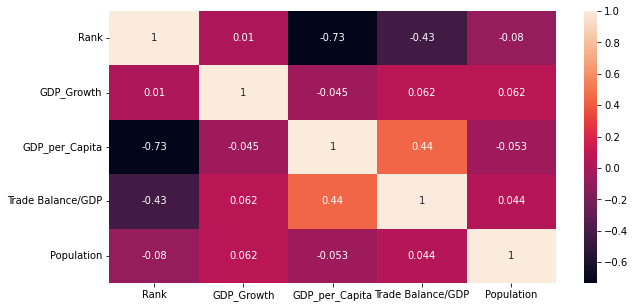

In [47]:
fig=py.figure(figsize=(10,5))
sns.heatmap(data.corr(),annot=True)

In [48]:
data['Population'].corr(data['GDP_Growth'])

0.062035304712797806

In [49]:
data['GDP_Growth'].corr(data['Trade Balance/GDP'])

0.0615448558272645

In [172]:
data['GDP_Growth'].corr(data['GDP_per_Capita'])

-0.04530976904246811

In [ ]:
#What is the Top and Lowest  5 Africa Countries By GDP_Growth and GDP_PER_CAPITAL

In [170]:
data

,Rank,Name,GDP_Growth,GDP_per_Capita,Trade Balance/GDP,Population,Continent
0,1,United Kingdom,1.7,39700.0,-3.8,65100000.0,Europe
1,2,Sweden,2.1,53400.0,3.3,9000000.0,Europe
2,3,Hong Kong,3.8,46200.0,4.3,7200000.0,Asia
3,4,Netherlands,2.9,48200.0,10.5,17200000.0,Europe
4,5,New Zealand,3.0,42900.0,-2.7,4500000.0,Oceania
...,...,...,...,...,...,...,...
156,157,Chad,-3.1,700.0,-5.7,15800000.0,Africa
157,158,Equatorial Guinea,-3.2,9900.0,-5.9,800000.0,Africa
158,159,Guinea-Bissau,5.9,700.0,-2.0,1800000.0,Africa
159,160,Republic of the Congo,-3.1,1700.0,-12.9,5100000.0,Africa


In [52]:
def country_to_continent(country_name):
    #Source: https://stackoverflow.com/questions/55910004/get-continent-name-from-country-using-pycountry
    
 
    country_alpha2 = pc.country_name_to_country_alpha2(country_name)
    country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
    country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
    
    return country_continent_name

In [53]:
country_to_continent('Nigeria')

'Africa'

In [54]:
data[data['Name']=='Timor-Leste']


,Rank,Name,GDP_Growth,GDP_per_Capita,Trade Balance/GDP,Population
110,111,Timor-Leste,-4.6,2300.0,-10.2,1300000.0


In [55]:
keep_data=data.iloc[110]


In [56]:
data.drop(110,axis=0, inplace=True)

In [57]:
data

,Rank,Name,GDP_Growth,GDP_per_Capita,Trade Balance/GDP,Population
0,1,United Kingdom,1.7,39700.0,-3.8,65100000.0
1,2,Sweden,2.1,53400.0,3.3,9000000.0
2,3,Hong Kong,3.8,46200.0,4.3,7200000.0
3,4,Netherlands,2.9,48200.0,10.5,17200000.0
4,5,New Zealand,3.0,42900.0,-2.7,4500000.0
...,...,...,...,...,...,...
156,157,Chad,-3.1,700.0,-5.7,15800000.0
157,158,Equatorial Guinea,-3.2,9900.0,-5.9,800000.0
158,159,Guinea-Bissau,5.9,700.0,-2.0,1800000.0
159,160,Republic of the Congo,-3.1,1700.0,-12.9,5100000.0


In [58]:
data.replace(["Cote d'Ivoire"],'Ivory Coast',inplace=True)

In [59]:
data[data['Name']=="Ivory Coast"]

,Rank,Name,GDP_Growth,GDP_per_Capita,Trade Balance/GDP,Population
116,117,Ivory Coast,7.8,1700.0,-4.6,26300000.0


In [60]:
data['Continent']=data['Name'].apply(lambda x: country_to_continent(x))

In [61]:
data

,Rank,Name,GDP_Growth,GDP_per_Capita,Trade Balance/GDP,Population,Continent
0,1,United Kingdom,1.7,39700.0,-3.8,65100000.0,Europe
1,2,Sweden,2.1,53400.0,3.3,9000000.0,Europe
2,3,Hong Kong,3.8,46200.0,4.3,7200000.0,Asia
3,4,Netherlands,2.9,48200.0,10.5,17200000.0,Europe
4,5,New Zealand,3.0,42900.0,-2.7,4500000.0,Oceania
...,...,...,...,...,...,...,...
156,157,Chad,-3.1,700.0,-5.7,15800000.0,Africa
157,158,Equatorial Guinea,-3.2,9900.0,-5.9,800000.0,Africa
158,159,Guinea-Bissau,5.9,700.0,-2.0,1800000.0,Africa
159,160,Republic of the Congo,-3.1,1700.0,-12.9,5100000.0,Africa


In [62]:
keep_data['Continent']='Asia'

In [63]:
data=pd.concat([data,pd.DataFrame(keep_data).T],axis=0).sort_values(by='Rank')

In [78]:
data.head(4)

,Rank,Name,GDP_Growth,GDP_per_Capita,Trade Balance/GDP,Population,Continent
0,1,United Kingdom,1.7,39700.0,-3.8,65100000.0,Europe
1,2,Sweden,2.1,53400.0,3.3,9000000.0,Europe
2,3,Hong Kong,3.8,46200.0,4.3,7200000.0,Asia
3,4,Netherlands,2.9,48200.0,10.5,17200000.0,Europe


In [65]:
data.groupby('Continent').count()

,Rank,Name,GDP_Growth,GDP_per_Capita,Trade Balance/GDP,Population
Continent,,,,,,
Africa,47,47,47,47,47,47
Asia,46,46,46,46,46,46
Europe,39,39,39,39,39,39
North America,14,14,14,14,14,14
Oceania,3,3,3,3,3,3
South America,12,12,12,12,12,12


In [66]:
#What is the Top and Lowest  5 Africa Countries By GDP_Growth and GDP_PER_CAPITAL							

africa=data[data['Continent']=='Africa']

In [69]:

africa.head(5)

,Rank,Name,GDP_Growth,GDP_per_Capita,Trade Balance/GDP,Population,Continent
38,39,Mauritius,3.8,10500.0,-6.6,1400000.0,Africa
58,59,South Africa,1.3,6200.0,-2.5,55400000.0,Africa
61,62,Morocco,4.1,3000.0,-3.6,34300000.0,Africa
65,66,Seychelles,5.3,15500.0,-20.5,100000.0,Africa
81,82,Tunisia,2.0,3500.0,-10.5,11500000.0,Africa


In [ ]:
africa=africa.apply(pd.to_numeric, errors='ignore')

In [75]:
africa.head(3)

,Rank,Name,GDP_Growth,GDP_per_Capita,Trade Balance/GDP,Population,Continent
38,39,Mauritius,3.8,10500.0,-6.6,1400000.0,Africa
58,59,South Africa,1.3,6200.0,-2.5,55400000.0,Africa
61,62,Morocco,4.1,3000.0,-3.6,34300000.0,Africa


In [81]:
top_africa=africa.nlargest(n=5,columns=['GDP_Growth','GDP_per_Capita'])
top_africa

,Rank,Name,GDP_Growth,GDP_per_Capita,Trade Balance/GDP,Population,Continent
151,152,Libya,64.0,8000.0,8.4,6800000.0,Africa
145,146,Ethiopia,10.9,800.0,-8.1,108400000.0,Africa
93,94,Ghana,8.4,1600.0,-4.5,28100000.0,Africa
150,151,Guinea,8.2,800.0,-6.9,11900000.0,Africa
116,117,Ivory Coast,7.8,1700.0,-4.6,26300000.0,Africa


<AxesSubplot:xlabel='GDP_per_Capita'>

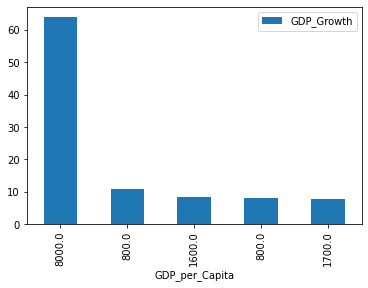

In [105]:
#Visialize Top 5 and lowest Africa Countries By GDP_Growth and GDP_PER_CAPITAL							

top_africa[['GDP_Growth','GDP_per_Capita']].plot(kind='bar',x='GDP_per_Capita')

In [112]:
africa[['GDP_Growth','GDP_per_Capita']][0:4]

,GDP_Growth,GDP_per_Capita
38,3.8,10500.0
58,1.3,6200.0
61,4.1,3000.0
65,5.3,15500.0


In [96]:
low_africa=africa.nsmallest(n=5,columns=['GDP_Growth','GDP_per_Capita'])
low_africa

,Rank,Name,GDP_Growth,GDP_per_Capita,Trade Balance/GDP,Population,Continent
157,158,Equatorial Guinea,-3.2,9900.0,-5.9,800000.0,Africa
156,157,Chad,-3.1,700.0,-5.7,15800000.0,Africa
159,160,Republic of the Congo,-3.1,1700.0,-12.9,5100000.0,Africa
137,138,Angola,-2.5,4200.0,-1.0,30400000.0,Africa
133,134,Lesotho,-1.6,1200.0,-3.7,1000000.0,Africa


<AxesSubplot:ylabel='GDP_per_Capita'>

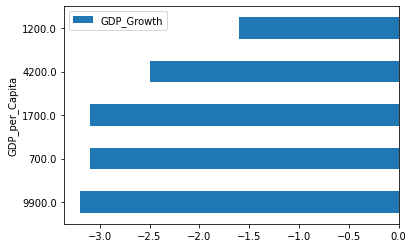

In [100]:
low_africa[['GDP_Growth','GDP_per_Capita']].plot(kind='barh',x='GDP_per_Capita')

In [149]:
data=data.apply(pd.to_numeric,errors='ignore')
data.head(5)

,Rank,Name,GDP_Growth,GDP_per_Capita,Trade Balance/GDP,Population,Continent
0,1,United Kingdom,1.7,39700.0,-3.8,65100000.0,Europe
1,2,Sweden,2.1,53400.0,3.3,9000000.0,Europe
2,3,Hong Kong,3.8,46200.0,4.3,7200000.0,Asia
3,4,Netherlands,2.9,48200.0,10.5,17200000.0,Europe
4,5,New Zealand,3.0,42900.0,-2.7,4500000.0,Oceania


In [ ]:
#What is the Top and Lowest  5 Europe Countries By GDP_Growth and GDP_PER_CAPITAL							


In [118]:
europe=data[data['Continent']=='Europe']
europe.head(5)

,Rank,Name,GDP_Growth,GDP_per_Capita,Trade Balance/GDP,Population,Continent
0,1,United Kingdom,1.7,39700.0,-3.8,65100000.0,Europe
1,2,Sweden,2.1,53400.0,3.3,9000000.0,Europe
3,4,Netherlands,2.9,48200.0,10.5,17200000.0,Europe
6,7,Denmark,2.3,56300.0,7.6,5800000.0,Europe
9,10,Switzerland,1.7,80200.0,9.8,8300000.0,Europe


In [129]:
europe=europe.apply(pd.to_numeric,errors='ignore')


In [138]:
top_euro=europe.nlargest(n=5, columns=['GDP_Growth','GDP_per_Capita'])
top_euro

,Rank,Name,GDP_Growth,GDP_per_Capita,Trade Balance/GDP,Population,Continent
10,11,Ireland,7.2,69300.0,8.5,5100000.0,Europe
40,41,Romania,6.9,10800.0,-3.4,21500000.0,Europe
42,43,Malta,6.7,26900.0,13.6,400000.0,Europe
30,31,Slovenia,5.0,23600.0,7.1,2100000.0,Europe
27,28,Estonia,4.9,19700.0,3.1,1200000.0,Europe


<AxesSubplot:xlabel='GDP_Growth'>

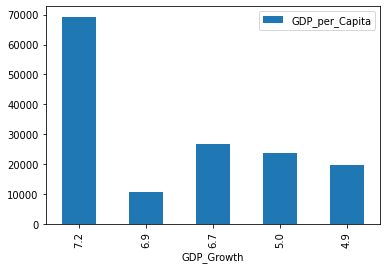

In [144]:
#Visialize Top 5 and lowest Europe Countries By GDP_Growth and GDP_PER_CAPITAL							

top_euro[['GDP_Growth','GDP_per_Capita']].plot(kind='bar',x='GDP_Growth')

In [146]:
low_euro=europe.nsmallest(n=5,columns=['GDP_Growth','GDP_per_Capita'])
low_euro

,Rank,Name,GDP_Growth,GDP_per_Capita,Trade Balance/GDP,Population,Continent
67,68,Macedonia,0.0,5400.0,-1.3,2100000.0,Europe
41,42,Greece,1.4,18600.0,-0.8,10800000.0,Europe
54,55,Russia,1.5,10700.0,2.2,142100000.0,Europe
29,30,Italy,1.5,32000.0,2.8,62200000.0,Europe
0,1,United Kingdom,1.7,39700.0,-3.8,65100000.0,Europe


<AxesSubplot:>

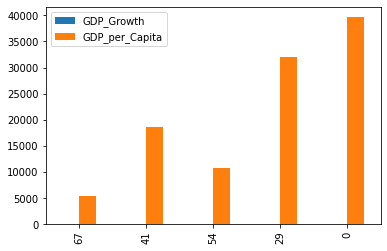

In [147]:
low_euro[['GDP_Growth','GDP_per_Capita']].plot(kind='bar')

In [157]:
#What is the Top and Lowest  5 Asia Countries By GDP_Growth and GDP_PER_CAPITAL							

asian=data[data['Continent']=='Asia']

In [159]:
asian.head(4)

,Rank,Name,GDP_Growth,GDP_per_Capita,Trade Balance/GDP,Population,Continent
2,3,Hong Kong,3.8,46200.0,4.3,7200000.0,Asia
7,8,Singapore,3.6,57700.0,18.8,5000000.0,Asia
11,12,Taiwan,2.9,24300.0,14.5,23500000.0,Asia
15,16,South Korea,3.1,29700.0,5.1,51400000.0,Asia


In [161]:
top_asian=asian.nlargest(n=5,columns=['GDP_Growth','GDP_per_Capita'])
top_asian

,Rank,Name,GDP_Growth,GDP_per_Capita,Trade Balance/GDP,Population,Continent
115,116,Nepal,7.9,800.0,-0.4,29700000.0,Asia
80,81,Armenia,7.5,3900.0,-2.8,2000000.0,Asia
56,57,Turkey,7.4,10500.0,-5.6,81300000.0,Asia
105,106,Bhutan,7.4,3100.0,-22.7,800000.0,Asia
108,109,Bangladesh,7.4,1500.0,-2.0,159500000.0,Asia


<AxesSubplot:xlabel='GDP_per_Capita'>

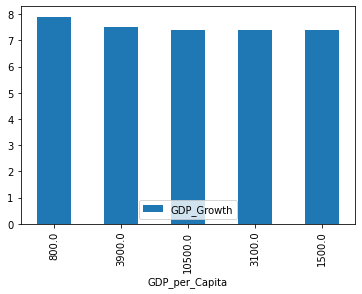

In [165]:
#Visialize Top 5  and lowest Asian Countries By GDP_Growth and GDP_PER_CAPITAL							

top_asian[['GDP_Growth','GDP_per_Capita']].plot(kind='bar',x='GDP_per_Capita')

In [167]:
low_asian=asian.nsmallest(n=5,columns=['GDP_Growth','GDP_per_Capita'])
low_asian

,Rank,Name,GDP_Growth,GDP_per_Capita,Trade Balance/GDP,Population,Continent
153,154,Syria,-36.5,1300.0,-8.6,19500000.0,Asia
152,153,Yemen,-5.9,1100.0,-4.0,28700000.0,Asia
110,111,Timor-Leste,-4.6,2300.0,-10.2,1300000.0,Asia
70,71,Kuwait,-3.3,29000.0,5.9,2900000.0,Asia
129,130,Iraq,-2.1,5200.0,2.3,40200000.0,Asia


<AxesSubplot:>

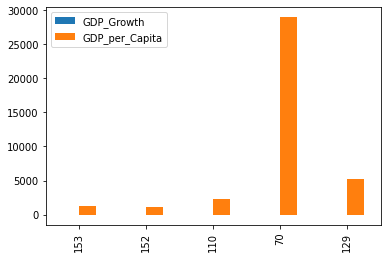

In [168]:
low_asian[['GDP_Growth','GDP_per_Capita']].plot(kind='bar')

In [179]:
#What is the Top and Lowest  5 North American Countries By GDP_Growth and GDP_PER_CAPITAL

north_america=data[data['Continent']=='North America']
north_america.head()

,Rank,Name,GDP_Growth,GDP_per_Capita,Trade Balance/GDP,Population,Continent
5,6,Canada,3.0,45000.0,-2.9,35900000.0,North America
16,17,United States,2.2,59500.0,-2.3,329300000.0,North America
47,48,Costa Rica,3.3,11600.0,-2.9,4000000.0,North America
53,54,Mexico,2.0,8900.0,-1.7,125000000.0,North America
74,75,Panama,5.4,15100.0,-4.9,3800000.0,North America


In [182]:
top_na=north_america.nlargest(n=5,columns=['GDP_Growth','GDP_per_Capita'])
top_na

,Rank,Name,GDP_Growth,GDP_per_Capita,Trade Balance/GDP,Population,Continent
74,75,Panama,5.4,15100.0,-4.9,3800000.0,North America
134,135,Nicaragua,4.9,2200.0,-5.0,6100000.0,North America
119,120,Honduras,4.8,2500.0,-1.7,9200000.0,North America
90,91,Dominican Republic,4.6,7100.0,-0.2,10300000.0,North America
47,48,Costa Rica,3.3,11600.0,-2.9,4000000.0,North America


<AxesSubplot:xlabel='GDP_Growth'>

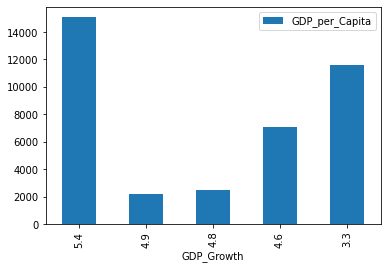

In [186]:
#Visialize Top 5 North Amerian  Countries By GDP_Growth and GDP_PER_CAPITAL							

top_na[['GDP_Growth','GDP_per_Capita']].plot(kind='bar',x='GDP_Growth')

In [183]:
#What is the Top and Lowest  5 South American Countries By GDP_Growth and GDP_PER_CAPITAL							

low_na=north_america.nlargest(n=5,columns=['GDP_Growth','GDP_per_Capita'])
low_na

,Rank,Name,GDP_Growth,GDP_per_Capita,Trade Balance/GDP,Population,Continent
74,75,Panama,5.4,15100.0,-4.9,3800000.0,North America
134,135,Nicaragua,4.9,2200.0,-5.0,6100000.0,North America
119,120,Honduras,4.8,2500.0,-1.7,9200000.0,North America
90,91,Dominican Republic,4.6,7100.0,-0.2,10300000.0,North America
47,48,Costa Rica,3.3,11600.0,-2.9,4000000.0,North America


<AxesSubplot:>

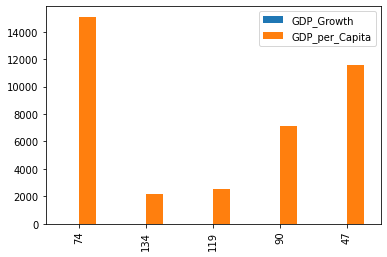

In [187]:
low_na[['GDP_Growth','GDP_per_Capita']].plot(kind='bar')

In [192]:
south_america=data[data.Continent=='South America']
south_america

,Rank,Name,GDP_Growth,GDP_per_Capita,Trade Balance/GDP,Population,Continent
32,33,Chile,1.5,15300.0,-1.5,17900000.0,South America
57,58,Uruguay,2.7,16200.0,1.5,3400000.0,South America
63,64,Peru,2.5,6600.0,-1.1,31300000.0,South America
66,67,Colombia,1.8,6300.0,-3.3,48200000.0,South America
72,73,Brazil,1.0,9800.0,-0.5,208800000.0,South America
75,76,Argentina,2.9,14400.0,-4.9,44700000.0,South America
98,99,Ecuador,2.4,6200.0,-0.3,16500000.0,South America
112,113,Guyana,2.1,4700.0,-6.7,700000.0,South America
114,114,Paraguay,4.8,4400.0,-0.8,6000000.0,South America
127,128,Bolivia,4.2,3400.0,-6.3,11300000.0,South America


In [196]:
top_sa=south_america.nlargest(n=5,columns=['GDP_Growth','GDP_per_Capita'])
top_sa

,Rank,Name,GDP_Growth,GDP_per_Capita,Trade Balance/GDP,Population,Continent
114,114,Paraguay,4.8,4400.0,-0.8,6000000.0,South America
127,128,Bolivia,4.2,3400.0,-6.3,11300000.0,South America
75,76,Argentina,2.9,14400.0,-4.9,44700000.0,South America
57,58,Uruguay,2.7,16200.0,1.5,3400000.0,South America
63,64,Peru,2.5,6600.0,-1.1,31300000.0,South America


<AxesSubplot:xlabel='GDP_per_Capita'>

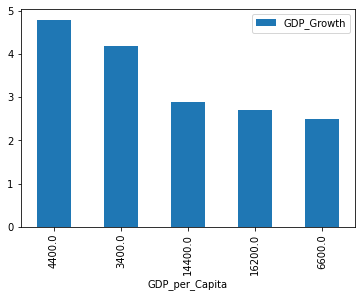

In [199]:
#Visualize is the Top and Lowest  5 South American Countries By GDP_Growth and GDP_PER_CAPITAL							

top_sa[['GDP_Growth','GDP_per_Capita']].plot(kind='bar',x='GDP_per_Capita')

In [197]:
low_sa=south_america.nlargest(n=5,columns=['GDP_Growth','GDP_per_Capita'])
low_sa

,Rank,Name,GDP_Growth,GDP_per_Capita,Trade Balance/GDP,Population,Continent
114,114,Paraguay,4.8,4400.0,-0.8,6000000.0,South America
127,128,Bolivia,4.2,3400.0,-6.3,11300000.0,South America
75,76,Argentina,2.9,14400.0,-4.9,44700000.0,South America
57,58,Uruguay,2.7,16200.0,1.5,3400000.0,South America
63,64,Peru,2.5,6600.0,-1.1,31300000.0,South America


<AxesSubplot:>

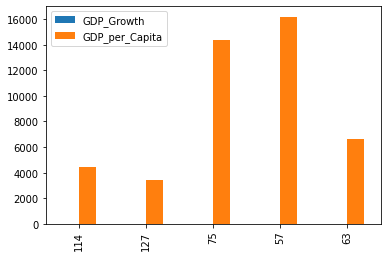

In [200]:
low_sa[['GDP_Growth','GDP_per_Capita']].plot(kind='bar')